In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
#get cuurrent working directory
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: /Users/naroacorettisanchez/Documents/GitHub/MobilityTable_SanSebastian/prediction


In [7]:
df= pd.read_csv('../includes/DataSS/Rides/trips.csv')
df


,starttime,start_lat,start_lon,target_lat,target_lon,scenario_id
0,16,43.318585,-1.949928,43.309878,-2.001317,2
1,3,43.305561,-1.972904,43.305180,-1.977889,3
2,7,43.304728,-1.973551,43.305543,-1.976029,3
3,8,43.303500,-1.975250,43.320450,-1.953839,3
4,8,43.304753,-1.972635,43.306493,-1.974995,3
...,...,...,...,...,...,...
370604,23,43.319422,-1.967409,43.305705,-1.970883,216
370605,23,43.318602,-1.966726,43.299847,-2.002031,216
370606,23,43.303709,-2.012915,43.318340,-1.974368,216
370607,23,43.303992,-1.979679,43.323387,-1.942371,216


In [12]:


value_counts = df['scenario_id'].value_counts().sort_index()
print(value_counts)

2         1
3        13
4        18
5        62
6        51
       ... 
212    2474
213    2475
214    2471
215    2445
216    2428
Name: scenario_id, Length: 215, dtype: int64


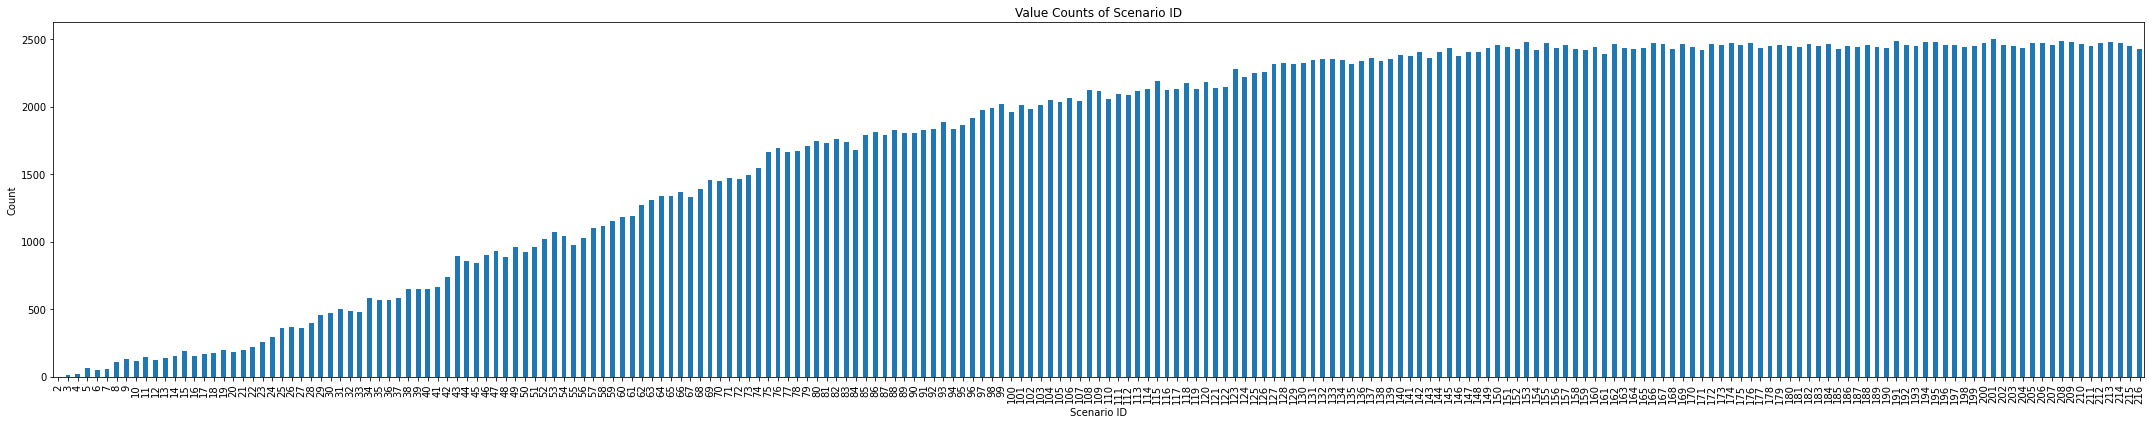

In [14]:
# Create a larger figure to give more space on the x-axis
plt.figure(figsize=(30, 6))  # You can adjust width and height as needed
value_counts.plot(kind='bar')
plt.title('Value Counts of Scenario ID')
plt.xlabel('Scenario ID')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



When we do the average of trips per day for the full year is 1356 for 2021  and 2188 for 2022

During these two years the system had 47 stations, now it has 70

(The specific day that we were modeling has around 2800 trips but its not the average)

In [15]:
#Get value for scenario_id 47 and 70

scenario_47_count = value_counts.get(47, 0)
scenario_70_count = value_counts.get(70, 0)
print(f"Scenario ID 47 Count: {scenario_47_count}")
print(f"Scenario ID 70 Count: {scenario_70_count}")

Scenario ID 47 Count: 931
Scenario ID 70 Count: 1449


So we can say it's underestimating by a lot 

In 2021 we had 1356 instead of 931  --> prediction was 30% less

In 2022 we has 2188 instead of 931 --> prediction was around 60% less

In the future we should review the prediction algoritm to fix this

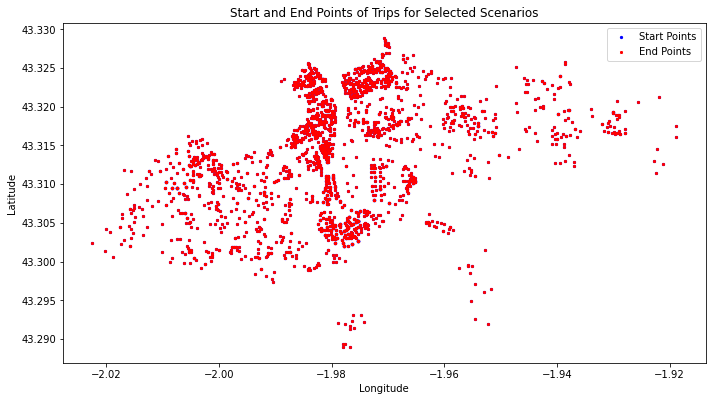

In [22]:
#Plot in a map the start and end points of the trips for scenario_id = x

import geopandas as gpd
from shapely.geometry import Point
# Filter the DataFrame for the specified scenario IDs
scenarios_to_plot = [150]
filtered_df = df[df['scenario_id'].isin(scenarios_to_plot)]
# Create GeoDataFrame for start points
start_points = gpd.GeoDataFrame(
    filtered_df,
    geometry=gpd.points_from_xy(filtered_df['start_lon'], filtered_df['start_lat']),
    crs="EPSG:4326"  # Assuming the coordinates are in WGS84
)
# Create GeoDataFrame for end points
end_points = gpd.GeoDataFrame(
    filtered_df,
    geometry=gpd.points_from_xy(filtered_df['target_lon'], filtered_df['target_lat']),
    crs="EPSG:4326"  # Assuming the coordinates are in WGS84
)
# Plotting the start and end points on a map
fig, ax = plt.subplots(figsize=(10, 10))
start_points.plot(ax=ax, color='blue', marker='o', label='Start Points', markersize=5)
end_points.plot(ax=ax, color='red', marker='x', label='End Points', markersize=5)
plt.title('Start and End Points of Trips for Selected Scenarios')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


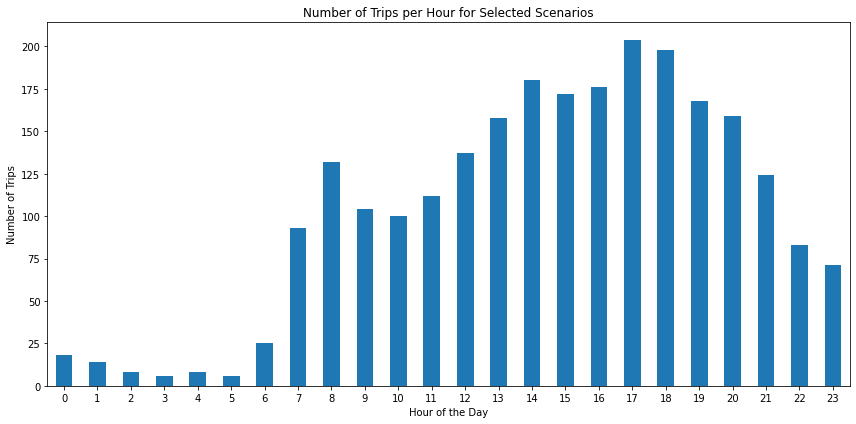

In [23]:

# Plotting the histogram of trips per hour
plt.figure(figsize=(12, 6))
filtered_df['starttime'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Trips per Hour for Selected Scenarios')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24), rotation=0)
plt.tight_layout()
plt.show()
# Plotting the histogram of trips per hour for scenario_id = 100